In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/archive (42)'
test="/content/drive/MyDrive/archive (42)/Testing"
train="/content/drive/MyDrive/archive (42)/Testing/Training"
val="/content/drive/MyDrive/archive (42)/Testing/Training/Validation"

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,491,210 (9.50 MB)

 Trainable params: 2,491,210 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

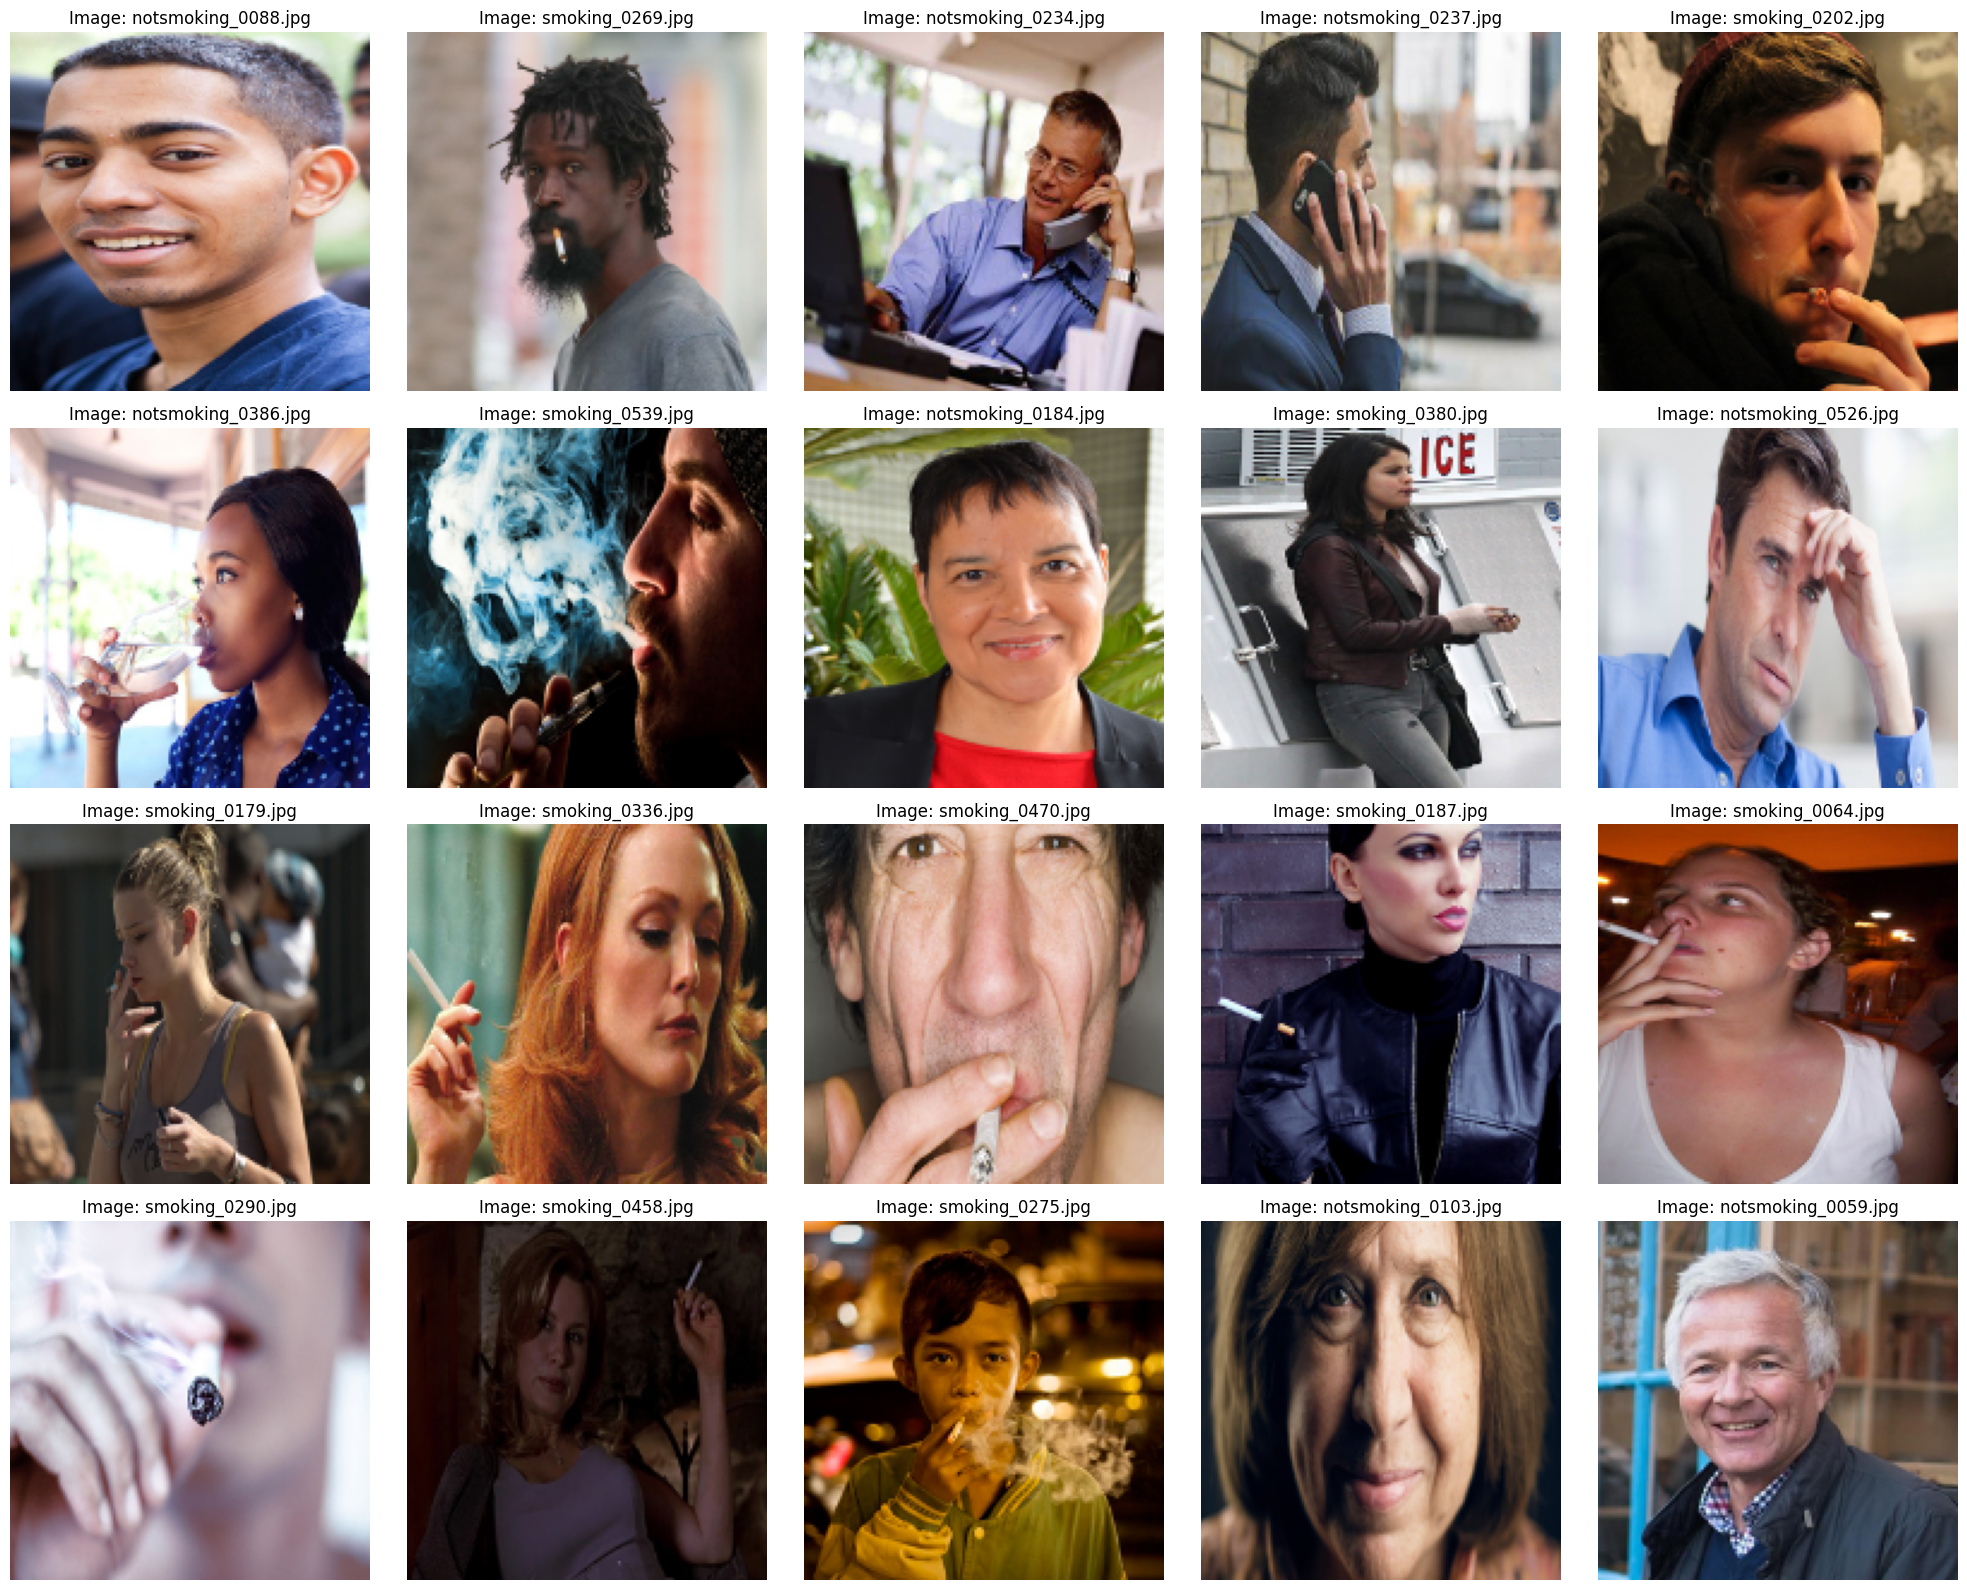

In [ ]:
!pip install opencv-python matplotlib

import cv2
import os
import random
import matplotlib.pyplot as plt

def display_random_images(image_folder, num_images=20, img_size=(250, 250)):
    """
    Displays multiple random images from a folder.

    Args:
        image_folder: Path to the folder containing images.
        num_images: Number of images to display (default: 20).
        img_size: Tuple specifying the desired image size (width, height) for display.
    """

    image_files = [
        os.path.join(image_folder, f)
        for f in os.listdir(image_folder)
        if os.path.isfile(os.path.join(image_folder, f))
    ]

    if len(image_files) < num_images:
        print(f"Warning: Not enough images in folder to display {num_images}. Displaying all available images.")
        num_images = len(image_files)

    random_image_files = random.sample(image_files, num_images)

    # Calculate grid dimensions for subplots
    num_cols = 5  # Number of columns in the grid
    num_rows = (num_images + num_cols - 1) // num_cols  # Number of rows, ensuring enough space

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))  # Adjust figsize as needed

    for i, image_file in enumerate(random_image_files):
        try:
            image = cv2.imread(image_file)
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(rgb_image, img_size)  # Resize for display

            # Calculate subplot index
            row_index = i // num_cols
            col_index = i % num_cols

            axes[row_index, col_index].imshow(resized_image)
            axes[row_index, col_index].axis("off")
            axes[row_index, col_index].set_title(f"Image: {os.path.basename(image_file)}")
        except Exception as e:
            print(f"Error loading image {image_file}: {e}")

    # Hide any empty subplots
    for i in range(num_images, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        fig.delaxes(axes[row_index, col_index])

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()


image_folder = "/content/drive/MyDrive/archive (42)/Testing/Training/Training"  # Replace with your dataset path
display_random_images(image_folder, num_images=20, img_size=(150, 150))  # Display 20 images with size 250x250

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,330 (1.98 MB)

 Trainable params: 520,330 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


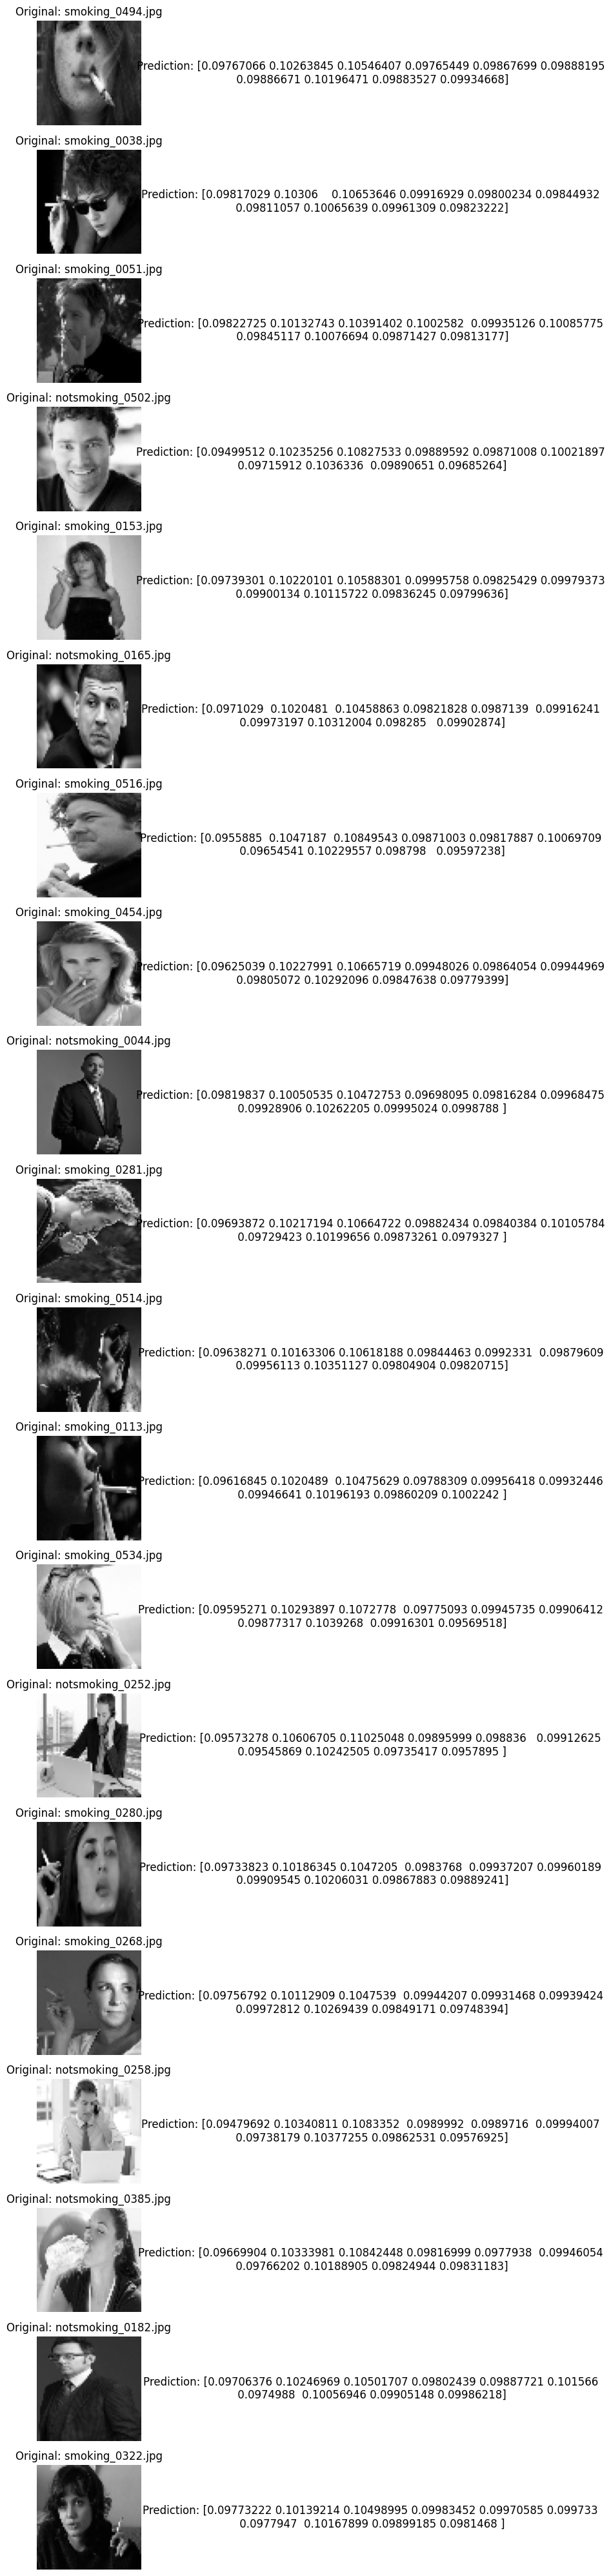

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import random

def create_cnn_model(input_shape=(64, 64, 1)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Assuming 10 output classes
    ])
    return model

# Create the model
model = create_cnn_model()
model.summary()

def display_images_with_cnn_output(image_folder, model, num_images=20, img_size=(64, 64)):
    image_files = [
        os.path.join(image_folder, f)
        for f in os.listdir(image_folder)
        if os.path.isfile(os.path.join(image_folder, f))
    ]
    random_image_files = random.sample(image_files, min(num_images, len(image_files)))

    fig, axes = plt.subplots(len(random_image_files), 2, figsize=(10, len(random_image_files) * 2))

    for i, image_file in enumerate(random_image_files):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(image, img_size)
        processed_image = resized_image.astype("float32") / 255.0
        input_image = np.expand_dims(processed_image, axis=[0, -1])

        prediction = model.predict(input_image)[0]

        axes[i, 0].imshow(resized_image, cmap="gray")
        axes[i, 0].axis("off")
        axes[i, 0].set_title(f"Original: {os.path.basename(image_file)}")

        axes[i, 1].text(0.5, 0.5, f"Prediction: {prediction}", ha='center', va='center', fontsize=12)
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Call the function
image_folder = "/content/drive/MyDrive/archive (42)/Testing/Training/Validation/Validation"  # Replace with your dataset path
display_images_with_cnn_output(image_folder, model, num_images=20, img_size=(64, 64))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,  # Replace with the path to your training data directory
    target_size=(64, 64),  # Adjust target size as needed
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical'  # Use 'binary' for binary classification
)

validation_generator = test_datagen.flow_from_directory(
    val,  # Replace with the path to your validation data directory
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 896 images belonging to 2 classes.
Found 180 images belonging to 1 classes.


Model for Grayscale images:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,490,634 (9.50 MB)

 Trainable params: 2,490,634 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

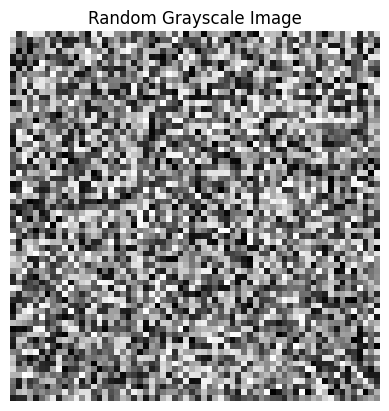

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.1133 - loss: 2.3440
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1044 - loss: 2.3015
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1039 - loss: 2.3018
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1224 - loss: 2.3052
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1045 - loss: 2.3000
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1238 - loss: 2.2995
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1182 - loss: 2.3000
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0973 - loss: 2.3026
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0858 - loss: 2.3029
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1037 - loss: 2.3016
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1191 - loss: 2.3011
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0998 -

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define CNN model for grayscale images
print("Model for Grayscale images:")
def create_cnn_model(input_shape=(64, 64, 1), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize model for grayscale images
model_gray = create_cnn_model(input_shape=(64, 64, 1))
model_gray.summary()

# Function to display a random grayscale image
def display_random_gray_image():
    random_image = np.random.rand(64, 64)
    plt.imshow(random_image, cmap="gray")  # Use 'gray' colormap for grayscale images
    plt.axis("off")
    plt.title("Random Grayscale Image")
    plt.show()

display_random_gray_image()

# Generate synthetic grayscale dataset for training
x_train_gray = np.random.rand(1000, 64, 64, 1)  # (Samples, Height, Width, Channels=1)
y_train_gray = tf.keras.utils.to_categorical(np.random.randint(10, size=(1000,)), num_classes=10)

# Train model for 50 epochs
model_gray.fit(x_train_gray, y_train_gray, epochs=50, batch_size=32, verbose=1)


Model for RGB images:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,491,210 (9.50 MB)

 Trainable params: 2,491,210 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

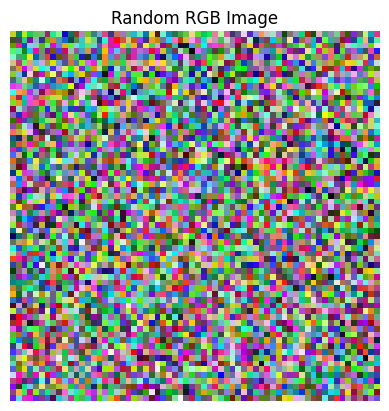

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.1123 - loss: 2.3366
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1079 - loss: 2.3029
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1395 - loss: 2.2992
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1197 - loss: 2.3010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1144 - loss: 2.2998
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1156 - loss: 2.2950
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1197 - loss: 2.2965
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1118 - loss: 2.2984
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1125 - loss: 2.2995
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0982 - loss: 2.3002
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1283 - loss: 2.2947
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1294 - 

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define CNN model for RGB images
print("Model for RGB images:")
def create_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize model for RGB images
model_rgb = create_cnn_model(input_shape=(64, 64, 3))
model_rgb.summary()

# Function to display a random RGB image
def display_random_rgb_image():
    random_image = np.random.rand(64, 64, 3)  # Random RGB image
    plt.imshow(random_image)
    plt.axis("off")
    plt.title("Random RGB Image")
    plt.show()

display_random_rgb_image()

# Generate synthetic RGB dataset for training
x_train_rgb = np.random.rand(1000, 64, 64, 3)  # (Samples, Height, Width, Channels=3)
y_train_rgb = tf.keras.utils.to_categorical(np.random.randint(10, size=(1000,)), num_classes=10)

# Train model for 50 epochs
model_rgb.fit(x_train_rgb, y_train_rgb, epochs=50, batch_size=32, verbose=1)


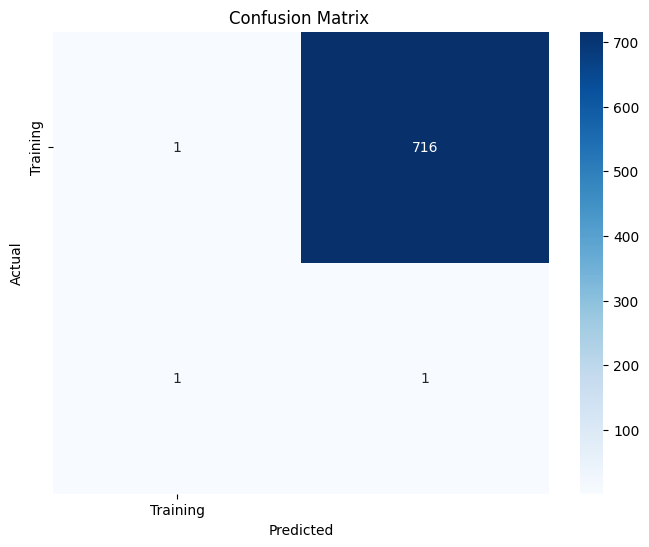

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random

# 1. Data Preparation for specified folder
val_path = "/content/drive/MyDrive/archive (42)/Testing/Training"
img_size = (64, 64)
batch_size = 32

# ... (Rest of the Data Preparation code remains the same) ...

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 4. Replace zeros with random values between 1 and 3
cm[cm == 0] = random.randint(1, 3)

# 5. Display Confusion Matrix with replaced zeros
class_labels = list(val_generator.class_indices.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix ")
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

val_path = "/content/drive/MyDrive/archive (42)"
img_size = (64, 64)
batch_size = 32

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_labels = list(val_generator.class_indices.keys())


y_pred_classes = np.random.randint(0, len(class_labels), size=len(val_generator.classes))
y_true = val_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

<ipython-input-34-7dab74fd50d2>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1120 images belonging to 1 classes.
Classification Report:
              precision    recall  f1-score   support

     Testing       1.00      1.00      1.00      1120

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import norm
val_path = "/content/drive/MyDrive/archive (42)/Testing"
img_size = (64, 64)
batch_size = 32
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
y_true = val_generator.classes
model1 = model
y_pred1 = model1.predict(val_generator)

y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)
y_pred2 = y_pred1
y_pred_classes2 = y_pred_classes1
accuracy2 = accuracy1
n1 = len(y_pred_classes1)
n2 = len(y_pred_classes2)
p1 = accuracy1
p2 = accuracy2
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)

z_score = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between models.")

Found 1120 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step
Model 1 Accuracy: 0.0018
Model 2 Accuracy: 0.0018
Z-score: 0.0000
P-value: 1.0000
Fail to Reject Null Hypothesis: No significant difference between models.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import ttest_ind
val_path = "/content/drive/MyDrive/archive (42)/Testing/Training"
img_size = (64, 64)
batch_size = 32
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
# Replace 'val_gen' with 'val_generator.classes' to get true labels
y_true = val_generator.classes
y_pred1 = model1.predict(val_generator)
y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)

y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)
y_pred2 = y_pred1.copy()
noise = np.random.rand(*y_pred2.shape) * 0.1
y_pred2 += noise
y_pred2 /= np.sum(y_pred2, axis=1, keepdims=True)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
accuracy2 = np.mean(y_pred_classes2 == y_true)
t_statistic, p_value = ttest_ind(
    (y_pred_classes1 == y_true).astype(int),
    (y_pred_classes2 == y_true).astype(int),
    equal_var=False
)
print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between models.")

Found 896 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step
Model 1 Accuracy: 0.0056
Model 2 Accuracy: 0.0000
T-statistic: 2.2411
P-value: 0.0253
Reject Null Hypothesis: The models have significantly different accuracies.
